In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [5]:
df = pd.read_csv(r"C:\Users\U S E R\Downloads\royalpurpledataproject.csv")


In [7]:
#to display all the columns 
pd.set_option('display.max_columns', None)

In [9]:
#to encode the target

df['Dropout_binary'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)


In [11]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout_binary
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


In [13]:
#to know which feautures strongly correlates to the traget
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality', "Mother's qualification",
        "Father's qualification", "Mother's occupation", "Father's occupation",
        'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
        'Unemployment rate', 'Inflation rate', 'GDP', 'Dropout_binary']
correlation_matrix = df[cols].corr()
print(correlation_matrix)

                                                Marital status  \
Marital status                                        1.000000   
Application mode                                      0.264006   
Application order                                    -0.125854   
Course                                                0.046365   
Daytime/evening attendance\t                         -0.274939   
Previous qualification                                0.062529   
Previous qualification (grade)                       -0.022406   
Nacionality                                          -0.008843   
Mother's qualification                                0.193163   
Father's qualification                                0.130353   
Mother's occupation                                   0.034994   
Father's occupation                                   0.031609   
Admission grade                                      -0.004771   
Displaced                                            -0.234886   
Educationa

#### the features:
Debtor                                                
Tuition fees up to date                                
Gender                                                  
Scholarship holder                                    
Age at enrollment    
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade) 
Application mode

In [15]:
#to see the propotion diff
df['Dropout_binary'].value_counts(normalize=True)


Dropout_binary
0    0.678797
1    0.321203
Name: proportion, dtype: float64

In [39]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])


In [45]:

# X = input features, Y = target
X = df[['Tuition fees up to date','Application mode', 'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)','Debtor','Scholarship holder','Age at enrollment','Displaced']]
Y = df['Dropout_binary']        
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy: 0.8271186440677966
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       569
           1       0.83      0.65      0.73       316

    accuracy                           0.83       885
   macro avg       0.83      0.79      0.80       885
weighted avg       0.83      0.83      0.82       885



In [47]:
model = RandomForestClassifier()
scores = cross_val_score(model, X, Y, cv=4)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("Accuracy for each fold:", scores)
print("Mean CV Accuracy: {:.4f}".format(scores.mean()))


Accuracy Score: 0.8260
Accuracy for each fold: [0.85985533 0.85895118 0.84267631 0.85352622]
Mean CV Accuracy: 0.8538


In [49]:


# 2. Define parameters with pipeline syntax
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__class_weight': ['balanced']
}

# 3. GridSearchCV using pipeline
grid = GridSearchCV(pipeline, param_grid, scoring='recall', cv=4)

# 4. Fit
grid.fit(X_train, Y_train)

# 5. Best model and evaluation
best_model = grid.best_estimator_
Y_pred = best_model.predict(X_test)

# 6. Metrics
print(classification_report(Y_test, Y_pred))
print("the confusion network",
    confusion_matrix(Y_test, Y_pred))



              precision    recall  f1-score   support

           0       0.87      0.87      0.87       569
           1       0.77      0.77      0.77       316

    accuracy                           0.84       885
   macro avg       0.82      0.82      0.82       885
weighted avg       0.83      0.84      0.83       885

the confusion network [[497  72]
 [ 74 242]]


### True Negative (TN = 497) These are students who didn’t drop out and the model correctly predicted they wouldn’t.

### False Positive (FP = 72) These are students who didn’t drop out, but the model incorrectly predicted they would.

### False Negative (FN = 74) These are students who actually dropped out, but the model missed them.

### True Positive (TP = 242) These are students who did drop out, and the model correctly predicted that.



C:\Users\U S E R\AppData\Local\Temp\ipykernel_19768\2929337992.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Dropout_binary'], hist=False, color="r", label="Actual Value")
C:\Users\U S E R\AppData\Local\Temp\ipykernel_19768\2929337992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

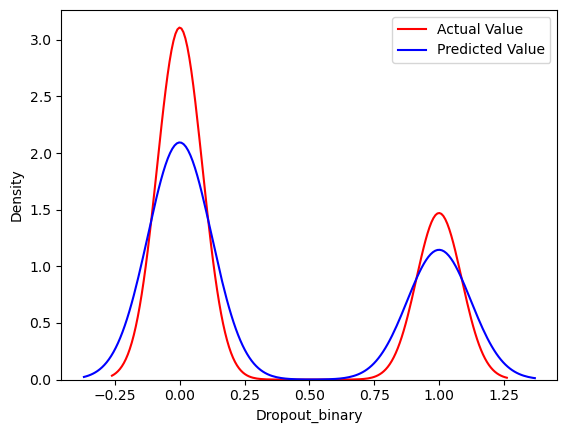

In [54]:
#visualize it
ax1 = sns.distplot(df['Dropout_binary'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [60]:
# 7. Optional: save model
import joblib
joblib.dump(best_model, 'dropout_model_pipeline.pkl')

['dropout_model_pipeline.pkl']